## Task A: Data Analysis

In [70]:

import pandas as pd
import io

df = pd.read_csv('ProductSales.csv') #read CSV file

df["month"] = df.month.map("{:02}".format)

df['year']=df['year'].astype(str)
# df['month']=df['month'].astype(str)

# if len(str(df['month'])) == 1:
#     df['month'] = "0"+df['month']
# else:
#     df['month'] = df['month']

df['Date'] = df['year'] + df['month'] #create a new column for month and date

# print(df.to_string())


<AxesSubplot:xlabel='Date'>

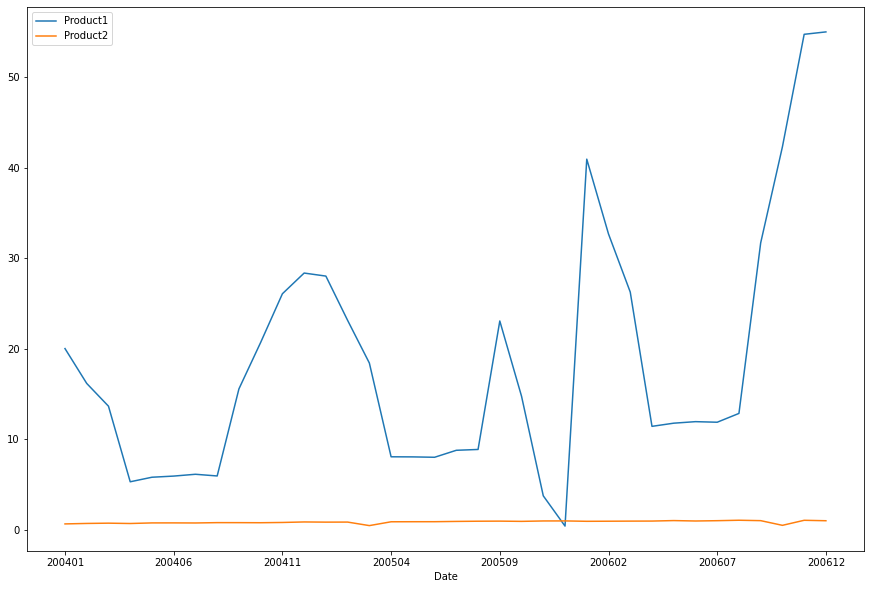

In [71]:
#Make graphs
import matplotlib.pyplot as plt

ax = plt.gca()
  
#use plot() method on the dataframe
df.plot( x = 'Date' , y = 'Product1', ax = ax, figsize=(15,10))
df.plot( x = 'Date' , y = 'Product2' , ax = ax, figsize=(15,10))

#product1 = df.plot(x='Date', y='Sales')


#### 1) Based on the nature of the products, hypothesize for each if it is seasonal or not. Analyze the sales numbers to test your hypothesis
The graph above shows that there might be seasonality for Product 1 since it visually depicts higher sales at the start of the year. Product 2, however, shows no seasonality. 

Therefore, the sales numbers for Product 1 will now be analysed.
I will assume this is a multiplicative model since there seems to be an upward trend along with some seasonality. 

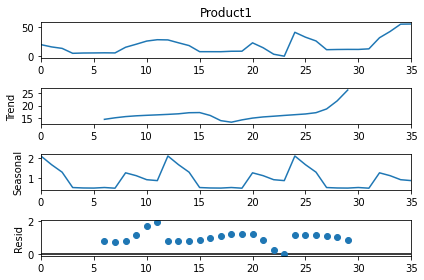

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# period = len(df['Date'])
decompose_result = seasonal_decompose(x=df['Product1'], model='multiplicative', period = 12)

decompose_result.plot()
plt.show()

#### 2) Estimate the months in 2005 for Product 1 which were affected by the supply disruption.

Based on the visual representation of the sales data, a supply disruption took place between the months of September to December. 

#### 3) Isolate any data points for Product 2 that are likely to have been affected by similar shortfalls

In Product 2, there were shortages in March 2005 and October 2006. This can be gauged from the line graph. 

In [14]:
# minvalue = df['Product2'].min()

minvalue = df.loc[df['Product2'].idxmin()]
print(minvalue)

year             2005
month              03
date           2005-3
Product1    18.422721
Product2     0.455451
Date           200503
Name: 14, dtype: object


#### 4) Estimate the expected sales in the affected months for each product.

In [63]:
import itertools


#Product1
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [72]:
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(df["#Passengers"], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, 
                         m=12, #12 is the frequncy of the cycle
                         start_P=0, 
                         seasonal=True, #set to seasonal
                         d=None, 
                         D=1, #order of the seasonal differencing
                         trace=False,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True) 
            

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Marzia Bilwani\\anaconda3\\Lib\\site-packages\\~tatsmodels\\nonparametric\\linbin.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
# Fitting the data to ARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_sarima = model_sarima.fit()
print(results_sarima.summary().tables[1])

#### 8) For each product, estimate if it is growing, declining or stable by the end of 2006.

Product 1 is growing.
Product 2 shows s table trend.